1. 학습용 데이터를 입력으로 fit() 메서드를 실행하면 평균값과 표준편차를 계산하여 객체내에 저장한다.
2. 다시 학습용 데이터를 입려으로 하여 transform() 메서드를 실행하면 저장했던 평균값을 빼서 새로운 평균값이 0이 되도록 만들고, 저장한 표준편차로 나누어 새로운 표준편차가 1이 되도록 데이터를 변환하여 출려한다. 1, 2 단계를 합치면 fit_transform()메서드를 실행할 수도 있다.
3. 검증용 데이터를 입력으로 하여 transform() 메서드를 실행해도 학습용 데이터의 평균값과 표준편차를 사용하여 검증용 데이터를 변환한다.

In [18]:
x = np.arange(7).reshape(-1, 1)
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(x)

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

- 만약 하나의 데이터가 동떨어져 아웃라이어가 존재하는 경우에는 스케일링을 했을 때 데이터가 0이 아닌 다른 곳으로 모일 수 있다. 예를 들어 6 다음에 1000을 넣게 되면 평균은 500번대가 나오기 때문에 1,2,3,4,5,6은 한쪽으로 몰리게 된다.

In [12]:
x2 = np.vstack([x, [[1000]]])
x2


array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [1000]])

In [14]:
scaler.fit_transform(x2)

array([[-0.38705669],
       [-0.38402392],
       [-0.38099115],
       [-0.37795839],
       [-0.37492562],
       [-0.37189286],
       [-0.36886009],
       [ 2.64570872]])

- 이때 RobustScaler 클래스를 사용하면 중앙값(median)은 0이되고, IQR은 1이 되도록 변환해주기 때문에 아웃라이어가 섞여 있어도 대부분의 데이터가 0주변에 남아 있게 된다.

In [15]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit_transform(x2)

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.84714286e+02]])

- PolynomialFeatures 클래스는 입력 데이터 x를 여러개의 다항식으로 변환한다. 예를 들어 degree(차수) 에 2를 입력하면 제곱인 항이 생기고 3을 넣게 되면 세제곱인 항 까지 입력되어 항이 추가 된다.. include_bias 는 상수항 생성여부를 말한다.

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
poly.fit_transform(x)

array([[  1.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.],
       [  1.,   6.,  36., 216.]])

- FuctionTransformer 클래스는 사용자가 지정한 함수를 사용하여 입력값 x를 변환한다. 데이터 변환은 비선형 회귀분석에서 원하는 목표값을 더 잘 예측하기 위한 새로운 데이터를 만들때 사용된다. 예를들어 360도와 같은 각도 데이터는 그 자체로 예측문제의 입력값으로 넣게 되면 0과 360도는 사실 같은 각도지만 다른 숫자로 표현되기 때문이다. 이때 각도 삼각함수값의 쌍으로 바꾸면 같은 각도를 같은 숫자쌍으로 표현할 수 있다.

In [27]:
X = 90*np.arange(9).reshape(-1,1)
X

array([[  0],
       [ 90],
       [180],
       [270],
       [360],
       [450],
       [540],
       [630],
       [720]])

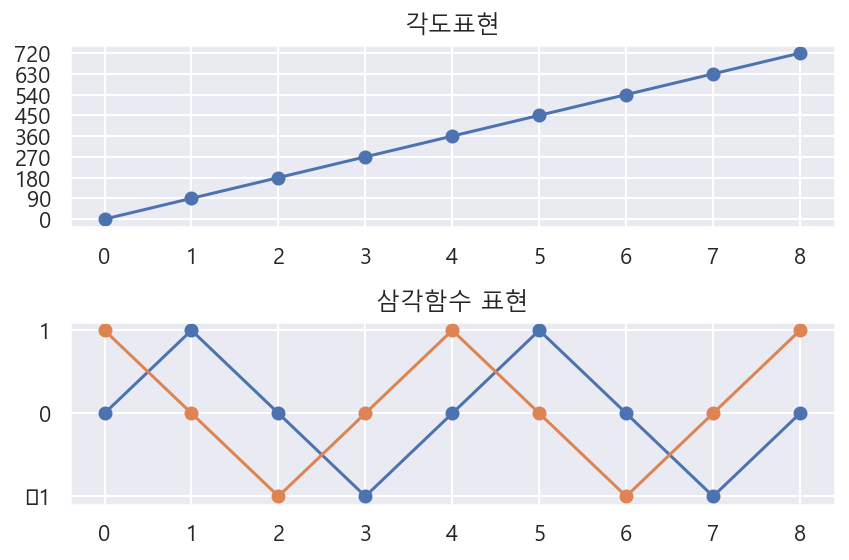

In [41]:
from sklearn.preprocessing import FunctionTransformer

def degree2sincos(X):
    x0 = np.sin(X*np.pi/180)
    x1 = np.cos(X*np.pi/180)
    X_new = np.hstack([x0,x1])
    return X_new

X2 = FunctionTransformer(degree2sincos).fit_transform(X)

plt.subplot(211)
plt.plot(X, marker='o')
plt.yticks(X.flatten())
plt.title("각도표현")
plt.subplot(212)
plt.plot(X2, marker='o')
plt.title("삼각함수 표현")
plt.tight_layout()
plt.show()

In [37]:
=

array([[  0],
       [ 90],
       [180],
       [270],
       [360],
       [450],
       [540],
       [630],
       [720]])

array([  0,  90, 180, 270, 360, 450, 540, 630, 720])